<a href="https://colab.research.google.com/github/chells990/Google-and-Intel-Stocks-Prediction-Using-Transformer-Encoder/blob/main/Google_and_Intel_Stocks_Prediction_Using_Transformer_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_GOOGL = pd.read_csv('GOOGL.csv')
df_INTC = pd.read_csv('INTC.csv')

#EDA

In [ ]:
#FILTERING HANYA MENGGUNAKAN kolom Date dan Close saja
df_GOOGL = df_GOOGL[['Date', 'Close']]
df_INTC = df_INTC[['Date', 'Close']]
print(df_GOOGL.head)
print(df_INTC.head)

<bound method NDFrame.head of             Date        Close
0     2004-08-19    50.220219
1     2004-08-20    54.209209
2     2004-08-23    54.754753
3     2004-08-24    52.487488
4     2004-08-25    53.053055
...          ...          ...
3927  2020-03-26  1162.920044
3928  2020-03-27  1110.260010
3929  2020-03-30  1146.310059
3930  2020-03-31  1161.949951
3931  2020-04-01  1102.099976

[3932 rows x 2 columns]>
<bound method NDFrame.head of              Date      Close
0      1980-03-17   0.325521
1      1980-03-18   0.322917
2      1980-03-19   0.330729
3      1980-03-20   0.329427
4      1980-03-21   0.317708
...           ...        ...
10093  2020-03-26  55.540001
10094  2020-03-27  52.369999
10095  2020-03-30  55.490002
10096  2020-03-31  54.119999
10097  2020-04-01  51.880001

[10098 rows x 2 columns]>


Pada kode di atas, saya melakukan filtering pada dataframe df_GOOGL dan df_INTC dengan hanya menyertakan kolom "Date" dan "Close" saja setelah itu dilakukan preview 5 data teratas dengan menggunakan head function.

In [ ]:
# Check the innformation/charactristics of the dataframe such as dtype dan missing value
df_GOOGL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3932 non-null   object 
 1   Close   3932 non-null   float64
dtypes: float64(1), object(1)
memory usage: 61.6+ KB


In [ ]:
df_INTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10098 non-null  object 
 1   Close   10098 non-null  float64
dtypes: float64(1), object(1)
memory usage: 157.9+ KB


Pada kode di atas, saya ingin melihat informasi tentang dataframe hal ini mencakup jumlah non-null values dalam setiap kolom, tipe data kolom, dan jumlah memori yang digunakan oleh dataframe.

In [ ]:
#problem kolom date type bukan datetime sehingga diganti

df_GOOGL['Date'] = pd.to_datetime(df_GOOGL['Date'])
df_INTC['Date'] = pd.to_datetime(df_INTC['Date'])

<ipython-input-467-69d05bb3a74a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GOOGL['Date'] = pd.to_datetime(df_GOOGL['Date'])
<ipython-input-467-69d05bb3a74a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_INTC['Date'] = pd.to_datetime(df_INTC['Date'])


Kode di atas mengubah kolom Date pada dataframe. Ini dilakukan karena dalam masalah timeseries, data harus diurutkan berdasarkan waktu dan tipe data datetime sehingga mempermudah operasi-operasi seperti pengurutan, penyaringan, dan resampling.

In [ ]:
df_GOOGL.index = df_GOOGL.pop('Date')
df_INTC.index = df_INTC.pop('Date')

Kode di atas mengatur kolom Date sebagai indeks pada dataframe, dengan mengubah kolom Date menjadi indeks pada dataframe memungkinkan kita untuk memanfaatkan fungsi-fungsi yang disediakan oleh Pandas untuk menganalisis data timeseries dengan lebih mudah

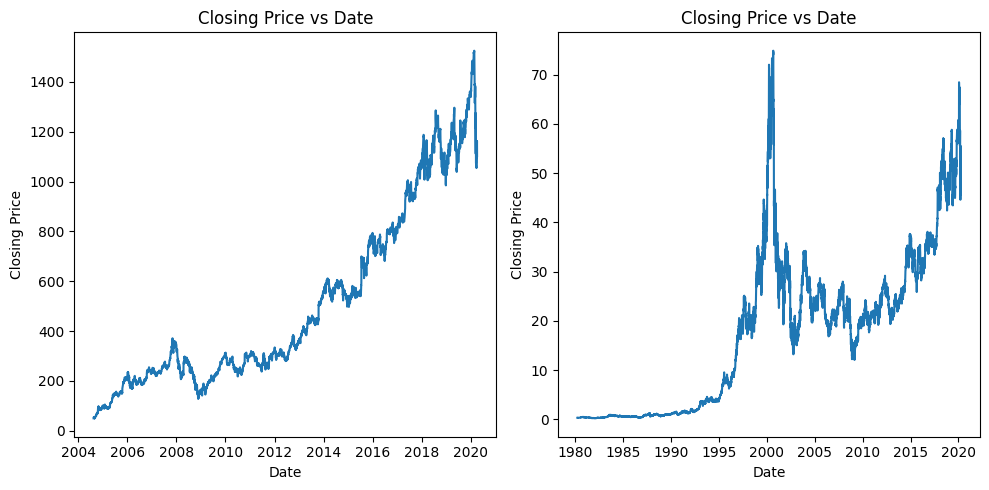

In [ ]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the close price vs index on the first subplot
ax1.plot(df_GOOGL['Close'])
ax1.set_title("Closing Price vs Date")
ax1.set_ylabel('Closing Price')
ax1.set_xlabel('Date')

# Plot the close price vs date on the second subplot
ax2.plot(df_INTC['Close'])
ax2.set_title("Closing Price vs Date")
ax2.set_ylabel('Closing Price')
ax2.set_xlabel('Date')

# Adjust the spacing between the subplots
plt.tight_layout()
plt.show()


Kode di atas membuat dan menampilkan plot dengan menggunakan subplot. Subplot pertama menampilkan grafik harga penutupan (Close) dari dataframe df_GOOGL terhadap indeksnya yang baru yaitu date. Subplot kedua menampilkan grafik harga penutupan (Close) dari dataframe df_INTC terhadap date.

#Preprocessing (2a)

Scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # create a scaler object
price = df_GOOGL['Close'].values.reshape(-1, 1) # get the column values and reshape them to a 2D array
scaled_price = scaler.fit_transform(price) # fit and transform the data
df_GOOGL['scaled_price'] = scaled_price # add the scaled data to the dataframe


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # create a scaler object
price = df_INTC['Close'].values.reshape(-1, 1) # get the column values and reshape them to a 2D array
scaled_price = scaler.fit_transform(price) # fit and transform the data
df_INTC['scaled_price'] = scaled_price # add the scaled data to the dataframe


Dngan melakukan scaling pada data dapat membantu model dalam hal kecepatan dan pembelajaran. Scaling mengubah rentang nilai data sehingga semua fitur memiliki rentang yang sama atau distribusi yang sama. Hal ini dapat meningkatkan kecepatan konvergensi algoritma pembelajaran mesin dan meningkatkan akurasi model dengan memastikan bahwa semua fitur memiliki bobot yang sama dalam proses pembelajaran.

In [ ]:
df_model_googl = df_GOOGL.drop(["Close"], axis=1)
df_model_googl.head(11)

,scaled_price
Date,
2004-08-19,0.000112
2004-08-20,0.002817
2004-08-23,0.003187
2004-08-24,0.001649
2004-08-25,0.002033
2004-08-26,0.002681
2004-08-27,0.002084
2004-08-30,0.000679
2004-08-31,0.000801


In [ ]:
df_model_intc = df_INTC.drop(["Close"], axis=1)
df_model_intc.head(20)

,scaled_price
Date,
1980-03-17,0.001465
1980-03-18,0.001430
1980-03-19,0.001535
1980-03-20,0.001517
1980-03-21,0.001360
1980-03-24,0.001273
1980-03-25,0.001291
1980-03-26,0.001256
1980-03-27,0.001116


Kode diatas melakukan preview terhadap data pada dataframe

# Time series data (2a)

In [ ]:
import numpy as np
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=5):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+6)

    if len(df_subset) != n+6:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['scaled_price'].to_numpy()
    x, y = values[:5], values[5:11]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  Y = np.array(Y)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Input(Target-{n-i})'] = X[:, i]

  for i in range(0, n):
    Y[:, i]
    ret_df[f'(Target {i+1})'] = Y[:, i]

  return ret_df


Fungsi df_to_windowed_df berfungsi untuk mengubah df yang diterima menjadi dataframe baru dengan (window size) 5 dan (horizon) 5. Fungsi ini mengambil data dari tanggal pertama hingga tanggal terakhir yang ditentukan, dan untuk setiap tanggal target, mengambil n+1 baris terakhir dari subset dataframe yang diurutkan berdasarkan waktu hingga tanggal target. Nilai scaled_price dari n baris pertama digunakan sebagai input, dan nilai scaled_price dari baris terakhir digunakan sebagai target. Fungsi ini mengembalikan dataframe baru dengan kolom Target Date, input, dan target.

In [ ]:
windowed_df_intc = df_to_windowed_df(df_model_intc,
                                '1980-03-31',
                                '2020-04-01', n=5)

windowed_df_googl = df_to_windowed_df(df_model_googl,
                                '2004-09-02',
                                '2020-04-01', n=5)

Model akan melihat 10 data terakhir (5 input & 5 output) yang dimulai dari starting point sampai end point yang sudah ditentukan untuk memprediksi nilai berikutnya.

In [ ]:
windowed_df_googl

,Target Date,Input(Target-5),Input(Target-4),Input(Target-3),Input(Target-2),Input(Target-1),(Target 1),(Target 2),(Target 3),(Target 4),(Target 5)
0,2004-09-02,0.000112,0.002817,0.003187,0.001649,0.002033,0.002681,0.002084,0.000679,0.000801,0.000081
1,2004-09-03,0.002817,0.003187,0.001649,0.002033,0.002681,0.002084,0.000679,0.000801,0.000081,0.000509
2,2004-09-07,0.003187,0.001649,0.002033,0.002681,0.002084,0.000679,0.000801,0.000081,0.000509,0.000000
3,2004-09-08,0.001649,0.002033,0.002681,0.002084,0.000679,0.000801,0.000081,0.000509,0.000000,0.000533
4,2004-09-09,0.002033,0.002681,0.002084,0.000679,0.000801,0.000081,0.000509,0.000000,0.000533,0.000777
...,...,...,...,...,...,...,...,...,...,...,...
3917,2020-03-26,0.719748,0.789397,0.693609,0.724162,0.705943,0.719829,0.690361,0.680814,0.732265,0.713015
3918,2020-03-27,0.789397,0.693609,0.724162,0.705943,0.719829,0.690361,0.680814,0.732265,0.713015,0.754579
3919,2020-03-30,0.693609,0.724162,0.705943,0.719829,0.690361,0.680814,0.732265,0.713015,0.754579,0.718873
3920,2020-03-31,0.724162,0.705943,0.719829,0.690361,0.680814,0.732265,0.713015,0.754579,0.718873,0.743317


In [ ]:
windowed_df_intc

,Target Date,Input(Target-5),Input(Target-4),Input(Target-3),Input(Target-2),Input(Target-1),(Target 1),(Target 2),(Target 3),(Target 4),(Target 5)
0,1980-03-31,0.001465,0.001430,0.001535,0.001517,0.001360,0.001273,0.001291,0.001256,0.001116,0.001273
1,1980-04-01,0.001430,0.001535,0.001517,0.001360,0.001273,0.001291,0.001256,0.001116,0.001273,0.001413
2,1980-04-02,0.001535,0.001517,0.001360,0.001273,0.001291,0.001256,0.001116,0.001273,0.001413,0.001430
3,1980-04-03,0.001517,0.001360,0.001273,0.001291,0.001256,0.001116,0.001273,0.001413,0.001430,0.001465
4,1980-04-07,0.001360,0.001273,0.001291,0.001256,0.001116,0.001273,0.001413,0.001430,0.001465,0.001378
...,...,...,...,...,...,...,...,...,...,...,...
10083,2020-03-26,0.607079,0.726154,0.594623,0.667889,0.634806,0.612437,0.610964,0.661192,0.698964,0.683695
10084,2020-03-27,0.726154,0.594623,0.667889,0.634806,0.612437,0.610964,0.661192,0.698964,0.683695,0.741022
10085,2020-03-30,0.594623,0.667889,0.634806,0.612437,0.610964,0.661192,0.698964,0.683695,0.741022,0.698562
10086,2020-03-31,0.667889,0.634806,0.612437,0.610964,0.661192,0.698964,0.683695,0.741022,0.698562,0.740352


Preview  data time series yang sudah dipisahkan menjadi dua bagian input dan output dengan window size = 5 dan horizon = 5

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:6]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1],1))
  Y = df_as_np[:, 6:11 ]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates_google, X_google, y_google = windowed_df_to_date_X_y(windowed_df_googl)
dates_intel, X_intel, y_intel = windowed_df_to_date_X_y(windowed_df_intc)

Fungsi windowed_df_to_date_X_y di untuk mengubah dataframe menjadi tiga array numpy: dates, X, dan Y.

Digunakan untuk mengubah dataframe windowed_df_googl dan windowed_df_intc menjadi array.


In [ ]:
print(dates_google.shape, X_google.shape, y_google.shape)
print(dates_intel.shape, X_intel.shape, y_intel.shape)

(3922,) (3922, 5, 1) (3922, 5)
(10088,) (10088, 5, 1) (10088, 5)


Menampilkan bentuk dari array numpy dates_google, X_google, y_google, dates_intel, X_intel, dan y_intel. Bentuk dari array dates_google dan dates_intel menunjukkan jumlah tanggal target yang ada pada dataframe asli. Bentuk dari array X_google dan X_intel menunjukkan jumlah tanggal target, jumlah fitur input, dan jumlah saluran/target (yang selalu 1 dalam kasus ini). Bentuk dari array y_google dan y_intel menunjukkan jumlah tanggal target dan horizon/output.

# Spliting data (2a)

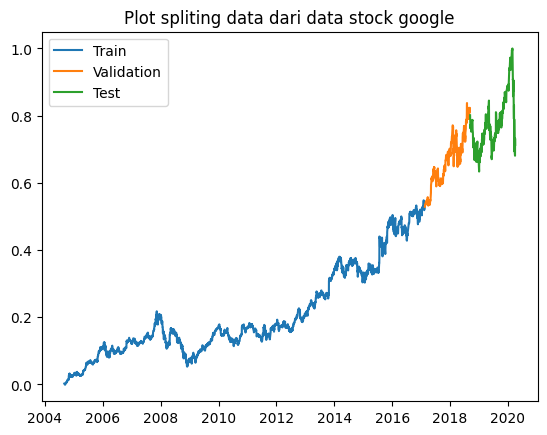

In [ ]:
q_80 = int(len(dates_google) * .8)
q_90 = int(len(dates_google) * .9)

dates_train_g, X_train_g, y_train_g = dates_google[:q_80-1], X_google[:q_80-1], y_google[:q_80-1]
dates_val_g, X_val_g, y_val_g = dates_google[q_80-1:q_90], X_google[q_80-1:q_90], y_google[q_80-1:q_90]
dates_test_g, X_test_g, y_test_g = dates_google[q_90:], X_google[q_90:], y_google[q_90:]

plt.title("Plot spliting data dari data stock google")
plt.plot(dates_train_g, y_train_g[:,0])
plt.plot(dates_val_g, y_val_g[:,0])
plt.plot(dates_test_g, y_test_g[:,0])

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
#shape data split google
print(len(dates_train_g))
print(len(y_train_g))
print(len(dates_val_g))
print(len(dates_test_g))
print(X_train_g.shape)

3136
3136
393
393
(3136, 5, 1)


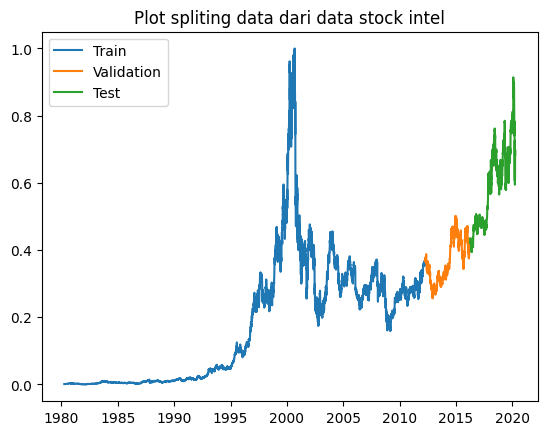

In [ ]:
q_80i = int(len(dates_intel) * .8)
q_90i = int(len(dates_intel) * .9)

dates_train_i, X_train_i, y_train_i = dates_intel[:q_80i], X_intel[:q_80i], y_intel[:q_80i]
dates_val_i, X_val_i, y_val_i = dates_intel[q_80i:q_90i], X_intel[q_80i:q_90i], y_intel[q_80i:q_90i]
dates_test_i, X_test_i, y_test_i = dates_intel[q_90i:], X_intel[q_90i:], y_intel[q_90i:]

plt.title("Plot spliting data dari data stock intel")
plt.plot(dates_train_i, y_train_i[:,0])
plt.plot(dates_val_i, y_val_i[:,0])
plt.plot(dates_test_i, y_test_i[:,0])

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
print(len(dates_train_i))
print(len(y_train_i))
print(len(dates_val_i))
print(len(dates_test_i))

8070
8070
1009
1009


Kode-kode di atas membagi data Google menjadi tiga set: set pelatihan, set validasi, dan set pengujian. Data dibagi dengan mengambil 80% data train, 10% data validation, dan 10% data test.

Kemudian, menampilkan grafik yang menunjukkan pembagian data dengan menampilkan nilai target untuk setiap set. Grafik menunjukkan perubahan nilai target dari waktu ke waktu untuk set pelatihan, set validasi, dan set pengujian.

Dan juga saya menampilkan panjang/len dari set train, test, valid untuk memastikan pembagian data nya sudah tepat.

Selain tuntutan soal, menggunakan rasio pembagian 80:10:10 seperti pada kode di atas adalah salah satu pilihan yang umum digunakan. Rasio ini memberikan jumlah data yang cukup untuk melatih model (80% dari data) sambil tetap menyisakan cukup data untuk mengevaluasi model selama pelatihan (10% dari data) dan mengevaluasi kinerja akhir model (10% dari data). Namun, rasio pembagian yang optimal dapat bervariasi tergantung pada jumlah data yang tersedia dan kompleksitas model yang digunakan.

# BaseModel Transformer (2b)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, MultiHeadAttention, Dense, Dropout, LayerNormalization, Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras import layers


def create_transformer_model(input_shape, num_heads, num_layers, dff):
    inputs = Input(shape=input_shape)
    #Input Embeeding & Position Encoding
    position = layers.Embedding(input_dim=input_shape[0], output_dim=input_shape[1])(tf.range(input_shape[0], dtype=tf.float32))
    x = inputs + position

    # Encoder layers
    for _ in range(num_layers):
        # Multi-head self-attention
        x = MultiHeadAttention(num_heads=num_heads, key_dim=32)(x, x)
        # Add & Norm
        x = Dropout(0.2)(x)
        LayerNormalization(epsilon=1e-6)(x)

        # Feed-forward neural network
        ffn = tf.keras.Sequential([
            Conv1D(filters=dff,activation='relu',kernel_size=5)
        ])
        ffn_output = ffn(x)
        # Add & Norm
        x = Dropout(0.2)(ffn_output+x)
        x = LayerNormalization(epsilon=1e-6)(x)

    # Output layer
    x = tf.keras.layers.Flatten()(x)
    outputs = Dense(5)(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

Model transformer ini berorientasi dengan permintaan dari soal yaitu encoder section dengan menggunakan requirement sebagai berikut: bagian FEED FORWARD menggunakan satu layer Conv1D saja
dengan Activation function menggunakan ReLU dan bagian node Perceptron pada output
disesuaikan dengan horizon datanya

In [ ]:
model_base = create_transformer_model(input_shape=(5, 1), num_heads=4, num_layers=2, dff=32)

model_base.compile(loss='mse',
              optimizer='sgd',
              metrics=['RootMeanSquaredError'])

model_base.summary()

Model: "model_49"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_77 (InputLayer)          [(None, 5, 1)]       0           []                               
                                                                                                  
 tf.__operators__.add_74 (TFOpL  (None, 5, 1)        0           ['input_77[0][0]']               
 ambda)                                                                                           
                                                                                                  
 multi_head_attention_250 (Mult  (None, 5, 1)        897         ['tf.__operators__.add_74[0][0]',
 iHeadAttention)                                                  'tf.__operators__.add_74[0][0]']
                                                                                           

In [ ]:
history_base_g = model_base.fit(X_train_g, y_train_g, validation_data=(X_val_g, y_val_g), epochs=5)

Epoch 1/5
98/98 [==============================] - 3s 12ms/step - loss: 0.4161 - root_mean_squared_error: 0.6451 - val_loss: 0.1365 - val_root_mean_squared_error: 0.3695
Epoch 2/5
98/98 [==============================] - 1s 10ms/step - loss: 0.1177 - root_mean_squared_error: 0.3431 - val_loss: 0.1045 - val_root_mean_squared_error: 0.3233
Epoch 3/5
98/98 [==============================] - 1s 10ms/step - loss: 0.0591 - root_mean_squared_error: 0.2431 - val_loss: 0.0734 - val_root_mean_squared_error: 0.2709
Epoch 4/5
98/98 [==============================] - 1s 10ms/step - loss: 0.0400 - root_mean_squared_error: 0.2001 - val_loss: 0.0682 - val_root_mean_squared_error: 0.2612
Epoch 5/5
98/98 [==============================] - 1s 9ms/step - loss: 0.0301 - root_mean_squared_error: 0.1734 - val_loss: 0.0682 - val_root_mean_squared_error: 0.2611


In [ ]:
history_base_i = model_base.fit(X_train_i, y_train_i, validation_data=(X_val_i, y_val_i), epochs=5)

Epoch 1/5
253/253 [==============================] - 5s 12ms/step - loss: 0.0284 - root_mean_squared_error: 0.1684 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0339
Epoch 2/5
253/253 [==============================] - 2s 10ms/step - loss: 0.0207 - root_mean_squared_error: 0.1439 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0792
Epoch 3/5
253/253 [==============================] - 2s 10ms/step - loss: 0.0168 - root_mean_squared_error: 0.1297 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0599
Epoch 4/5
253/253 [==============================] - 2s 10ms/step - loss: 0.0143 - root_mean_squared_error: 0.1197 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0402
Epoch 5/5
253/253 [==============================] - 3s 13ms/step - loss: 0.0139 - root_mean_squared_error: 0.1177 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0762


In [ ]:
rmse_gbase = history_base_g.history['root_mean_squared_error']
rmse_ibase = history_base_i.history['root_mean_squared_error']

print(f'Google stocks RMSE : {rmse_gbase}')
print(f'Intel stocks RMSE  : {rmse_ibase}')

Google stocks RMSE : [0.6450573801994324, 0.3431255519390106, 0.24310925602912903, 0.20011299848556519, 0.17344211041927338]
Intel stocks RMSE  : [0.1683816760778427, 0.1439337134361267, 0.12974709272384644, 0.11969267576932907, 0.11772926151752472]


Menampilkan nilai RMSE terakhir dengan evaluasi menggunakan train set & evaluation set.

In [ ]:
#EVALUASI
loss_g, rmse_g = model_base.evaluate(X_test_g, y_test_g)
loss_i, rmse_i = model_base.evaluate(X_test_i, y_test_i)
print()
print(f'Google stocks RMSE : {rmse_g:.4f}')
print(f'Intel stocks RMSE  : {rmse_i:.4f}')

32/32 [==============================] - 0s 4ms/step - loss: 0.0257 - root_mean_squared_error: 0.1603

Google stocks RMSE : 0.2349
Intel stocks RMSE  : 0.1603


Melakukan evaluasi pada test set dengan menggunakan metric rmse pada test set dari modelbase Google dan Intel. Berdasarkan output tersebut terlihat bahwa nilai rmse dari kedua model ini bisa dikatakan sangat buruk karena nilai error yang besar. Maka dari itu saya akan melakukan tunning pada model untuk membuat model baru dengan performa yang lebih baik.

32/32 [==============================] - 0s 4ms/step


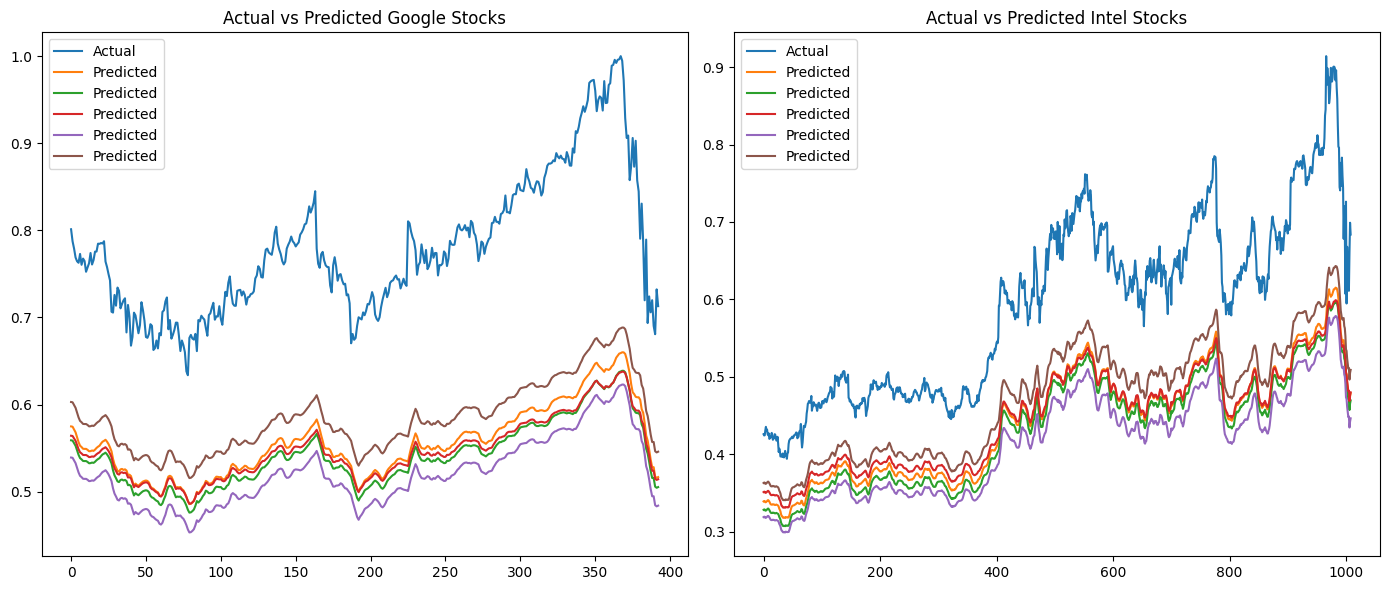

In [ ]:
test_predictions_g = model_base.predict(X_test_g)
#test pred in intel
test_predictions_i = model_base.predict(X_test_i)

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Plot the first subplot (Google stocks)
ax1.plot(y_test_g[:,0], label='Actual')
ax1.plot(test_predictions_g, label='Predicted')
ax1.set_title('Actual vs Predicted Google Stocks')
ax1.legend()

# Plot the second subplot (Intel stocks)
ax2.plot(y_test_i[:,0], label='Actual')
ax2.plot(test_predictions_i, label='Predicted')
ax2.set_title('Actual vs Predicted Intel Stocks')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

# Tunning model (2c)

Tune list:

num_heads, dff, lr, optimizer, epoch, menambahkan layer dan regularisasi 'l2' pada layer feed forwrd, key dim jadi 64, mengganti dropout rate.

Alasan:
- Num_heads:

Dengan meningkatkan jumlah (heads), model memiliki kapasitas yang lebih besar untuk memperhatikan interaksi yang kompleks.

- Menambahkan layer dan Regularisasi 'l2' pada Layer Feed Forward:

Dengan menambahkan layer dapat membantu model dalam mempelajari data dengan lebih baik, dan regularisasi "l2" dapat membantu mencegah overfitting, dan meningkatkan generalisasi.

- Mengganti dropout rate:

dropout rate 0.02 mungkin lebih rendah dari yang umumnya digunakan, saya memilihnya sebagai regularisasi yang ringan untuk memperoleh keseimbangan antara menghindari overfitting dan mempertahankan kapasitas model untuk belajar dari data yang lebih rumit karena dapat mempertahankan lebih banyak informasi selama pelatihan, sambil tetap mencegah model dari terlalu mempelajari pola-pola data yang spesifik.

- Key dimension:

Karena data-data saham mempunyai hubungan yang kompleks, maka dari itu mungkin diperlukan key dimension yang lebih besar (dalam hal ini saya menambah jadi 64) untuk memungkinkan model menangkap interaksi yang lebih rumit.

- DFF/filter:

Meningkatkan jumlah filter/dff pada Conv1D dapat bermanfaat bagi performa model. Namun di sisi lain, dff yang terlalu besar dapat menyebabkan overfitting dan meningkatkan kompleksitas komputasi. Oleh karena itu, saya mencoba dengan 64.

- Mengganti optimizer menjadi Adam:

Optimizer Adam biasanya memberikan hasil yang lebih baik daripada optimizer lainnya dalam hal kecepatan konvergensi dan akurasi.

- Mengganti learning rate:

Learning rate yang terlalu tinggi dapat menyebabkan model tidak konvergen, sedangkan learning rate yang terlalu rendah dapat menyebabkan pelatihan berlangsung sangat lama. Dikarenakan saya mengganti optimizer dan by default learning ratenya juga ikut berubah (by default di keras sgd lr = 0.01 diganti menjadi adam lr = 0.001) dan juga menurut saya lr = 0.001 itu pas karea tidak terlalu tinggi dan juga tidak terlalu rendah.

- Menambahkan epoch menjadi 15:

Memberikan model lebih banyak kesempatan untuk mempelajari pola jangka panjang dalam data saham.

In [ ]:
def create_transformer_model_tune(input_shape, num_heads, num_layers, dff):
  inputs = Input(shape=input_shape)
  #Input Embeeding & Position Encoding
  position = layers.Embedding(input_dim=input_shape[0], output_dim=input_shape[1])(tf.range(input_shape[0], dtype=tf.float32))
  x = inputs
  # Encoder layers
  for _ in range(num_layers):
      #Multi-head self-attention
      x = MultiHeadAttention(num_heads, key_dim=64)(x,x)
      x = Dropout(0.02)(x)
      LayerNormalization(epsilon=1e-6)(x)

      # Feed-forward neural network
      ffn = tf.keras.Sequential([
          Conv1D(filters=dff,activation='relu',kernel_size=5),
          Dense(5, activation='relu', kernel_regularizer='l2')
      ])
      ffn_output = ffn(x)
      x = Dropout(0.02)(ffn_output+x)
      LayerNormalization(epsilon=1e-6)(x)

  #Output layer
  x = tf.keras.layers.Flatten()(x)
  outputs = Dense(5)(x)

  model = Model(inputs=inputs, outputs=outputs)
  return model


In [ ]:
model_tune = create_transformer_model_tune(input_shape=(5, 1), num_heads=8, num_layers=6, dff=64)

model_tune.compile(optimizer="adam", loss='mse', metrics=['RootMeanSquaredError'])

model_tune.summary()

Model: "model_50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_78 (InputLayer)          [(None, 5, 1)]       0           []                               
                                                                                                  
 multi_head_attention_252 (Mult  (None, 5, 1)        3585        ['input_78[0][0]',               
 iHeadAttention)                                                  'input_78[0][0]']               
                                                                                                  
 dropout_459 (Dropout)          (None, 5, 1)         0           ['multi_head_attention_252[0][0]'
                                                                 ]                                
                                                                                           

In [ ]:
history_tune_g = model_tune.fit(X_train_g, y_train_g, validation_data=(X_val_g, y_val_g), epochs=15)

Epoch 1/15
98/98 [==============================] - 15s 64ms/step - loss: 0.3609 - root_mean_squared_error: 0.0941 - val_loss: 0.1968 - val_root_mean_squared_error: 0.0453
Epoch 2/15
98/98 [==============================] - 5s 47ms/step - loss: 0.1179 - root_mean_squared_error: 0.0425 - val_loss: 0.0600 - val_root_mean_squared_error: 0.0235
Epoch 3/15
98/98 [==============================] - 5s 46ms/step - loss: 0.0347 - root_mean_squared_error: 0.0356 - val_loss: 0.0171 - val_root_mean_squared_error: 0.0389
Epoch 4/15
98/98 [==============================] - 6s 61ms/step - loss: 0.0094 - root_mean_squared_error: 0.0335 - val_loss: 0.0111 - val_root_mean_squared_error: 0.0872
Epoch 5/15
98/98 [==============================] - 5s 46ms/step - loss: 0.0027 - root_mean_squared_error: 0.0315 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0764
Epoch 6/15
98/98 [==============================] - 5s 53ms/step - loss: 0.0011 - root_mean_squared_error: 0.0282 - val_loss: 5.7409e-04 - val_r

In [ ]:
history_tune_i = model_tune.fit(X_train_i, y_train_i, validation_data=(X_val_i, y_val_i), epochs=15)

Epoch 1/15
253/253 [==============================] - 18s 51ms/step - loss: 0.0016 - root_mean_squared_error: 0.0402 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0343
Epoch 2/15
253/253 [==============================] - 14s 57ms/step - loss: 0.0012 - root_mean_squared_error: 0.0350 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1044
Epoch 3/15
253/253 [==============================] - 13s 51ms/step - loss: 0.0012 - root_mean_squared_error: 0.0337 - val_loss: 2.0461e-04 - val_root_mean_squared_error: 0.0138
Epoch 4/15
253/253 [==============================] - 13s 52ms/step - loss: 0.0010 - root_mean_squared_error: 0.0314 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0420
Epoch 5/15
253/253 [==============================] - 13s 51ms/step - loss: 8.3545e-04 - root_mean_squared_error: 0.0286 - val_loss: 2.6642e-04 - val_root_mean_squared_error: 0.0156
Epoch 6/15
253/253 [==============================] - 13s 51ms/step - loss: 8.6181e-04 - root_mean_squared_error: 0.02

In [ ]:
rmse_gtune = history_tune_g.history['root_mean_squared_error']
rmse_itune = history_tune_i.history['root_mean_squared_error']

print(f'Google stocks RMSE training set: {rmse_gtune}')
print(f'Intel stocks RMSE training set : {rmse_itune}')

Google stocks RMSE training set: [0.09411254525184631, 0.042508359998464584, 0.03560085967183113, 0.033458858728408813, 0.03150618076324463, 0.028190014883875847, 0.02918657287955284, 0.026307009160518646, 0.030182069167494774, 0.026496827602386475, 0.024310670793056488, 0.025380663573741913, 0.02394239604473114, 0.024378696456551552, 0.02099502831697464]
Intel stocks RMSE training set : [0.040213603526353836, 0.03497137501835823, 0.03369494900107384, 0.03141973540186882, 0.0286136195063591, 0.029001014307141304, 0.029753224924206734, 0.028882963582873344, 0.026983479037880898, 0.024844005703926086, 0.026494095101952553, 0.026456868276000023, 0.023723682388663292, 0.02352961152791977, 0.02489343471825123]


Menampilkan nilai RMSE terakhir dengan evaluasi menggunakan train set & evaluation set.

# Evaluasi (2d)

In [ ]:
loss_gt, rmse_gt = model_tune.evaluate(X_test_g, y_test_g)
loss_it, rmse_it = model_tune.evaluate(X_test_i, y_test_i)
print("After tune: ")
print(f'Google stocks RMSE : {rmse_gt:.4f}')
print(f'Intel stocks RMSE  : {rmse_it:.4f}')
print()
print('Before tune : ')
print(f'Google stocks RMSE : {rmse_g:.4f}')
print(f'Intel stocks RMSE  : {rmse_i:.4f}')

32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - root_mean_squared_error: 0.0371
After tune: 
Google stocks RMSE : 0.0530
Intel stocks RMSE  : 0.0371

Before tune : 
Google stocks RMSE : 0.2349
Intel stocks RMSE  : 0.1603


Melakukan evaluasi dengan menggunakan data pada test set dengan menggunakan rmse untuk mengukur seberapa baik model cocok dengan dataset. Disini juga saya  membandingkan nilai rmse pada model_base atau dilakukan tunning, terbukti bahwa model yang dilakukan tuning adalah model yang lebih efisien/baik dikarenakan memiliki error yang lebih sedikit. Hal ini menandakan bahwa dengan melakukan tunning dengan benar dapat meningkatkan performa dari model.

32/32 [==============================] - 1s 15ms/step


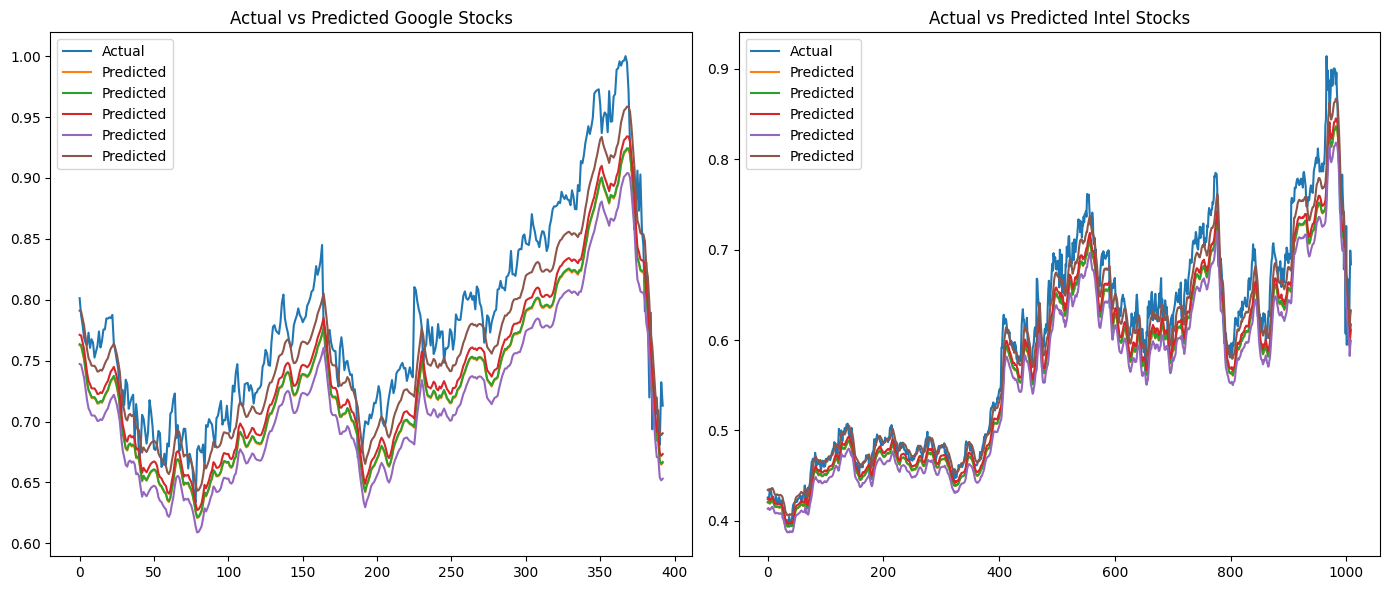

In [ ]:
test_predictions_gt = model_tune.predict(X_test_g)
#test pred in intel
test_predictions_it = model_tune.predict(X_test_i)

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Plot the first subplot (Google stocks)
ax1.plot(y_test_g[:,0], label='Actual')
ax1.plot(test_predictions_gt, label='Predicted')
ax1.set_title('Actual vs Predicted Google Stocks')
ax1.legend()

# Plot the second subplot (Intel stocks)
ax2.plot(y_test_i[:,0], label='Actual')
ax2.plot(test_predictions_it, label='Predicted')
ax2.set_title('Actual vs Predicted Intel Stocks')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


Membuat dua plot untuk evaluasi lanjutan yang dimana plot tersebut menampilkan grafik prediksi dan grouth truth di test data untuk model google dan intel.
Disini terlihat bahwa model sudah cukup baik namun memang tidak sebaik yang ada pada soal nomor 1, hal ini dikarenakan saya masih belum terlalu memahami arsitektur transformers sebaik saya memahami arsitektur lstm.